<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/TensorFlow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello World



In [ ]:
print("Hello World!")

Hello World!


#Hello 텐서플로 


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# Tensolflow 기초







## 난수 생성


In [ ]:
#난수 얻기(균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.69696283], shape=(1,), dtype=float32)


In [ ]:
#난수 여러개(균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.29850507 0.20665205 0.4142586  0.7239971 ], shape=(4,), dtype=float32)


In [ ]:
#난수 여러개(정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 1.4507028 -0.7078389  0.681816   1.2418281], shape=(4,), dtype=float32)


## 뉴런 만들기

In [ ]:
#활성화 함수(sigmoid)
import math
def sigmoid(x):
  return 1/(1 + math.exp(-x))

In [ ]:
# 뉴련의 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.20754830292745333


In [ ]:
#경사 하강법 이용 
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.07364882390103387 0.07364882390103387
199 -0.04339641134530484 0.04339641134530484
299 -0.030583194756261072 0.030583194756261072
399 -0.023561225339432352 0.023561225339432352
499 -0.019142135714371025 0.019142135714371025
599 -0.016109848944756002 0.016109848944756002
699 -0.013902071698787634 0.013902071698787634
799 -0.012223765886456548 0.012223765886456548
899 -0.01090537191079757 0.01090537191079757
999 -0.009842580931341716 0.009842580931341716


In [ ]:
#입력값 0 일떄 출력 1 을 얻는 뉴런의 학습
x=0
y=1
w=tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w= w+x*0.1*error  

  if i % 100 ==99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


**경사하강법의 업데이트 식이 w = w + X x α x error 이라 x=0이 되므로 w에 더해져 w값이 변하지 않음**

In [ ]:
#편향을 더한 뉴런의 출력 계산
x=0
y=1
w=tf.random.normal([1],0,1)
b=tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error 

  if i % 100 == 99:
    print(i, error , output)

99 0.08854915949497266 0.9114508405050273
199 0.04836629403031201 0.951633705969688
299 0.03300701237722403 0.966992987622776
399 0.024985122733461984 0.975014877266538
499 0.020075892166417808 0.9799241078335822
599 0.01676820127733636 0.9832317987226636
699 0.014390753672400836 0.9856092463275992
799 0.012600631579057331 0.9873993684209427
899 0.01120473128614119 0.9887952687138588
999 0.010086039052984441 0.9899139609470156


## AND


In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum=0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j]* 0.1 *error
    b = b + b_x * 0.1 *error
    error_sum += error

  if i % 200 ==199:
    print(i, error_sum)

199 -0.11256299231932654
399 -0.066491461729691
599 -0.0470766982559757
799 -0.036330990730987736
999 -0.029524283030724335
1199 -0.024836650203542043
1399 -0.021416320317462056
1599 -0.018815766621584136
1799 -0.01676989173532143
1999 -0.015121727277798326


In [ ]:
#AND 네트워크 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9646955692989921
X: [1 0] Y: [0] Output: 0.02501673817940126
X: [0 1] Y: [0] Output: 0.02509374257169635
X: [0 0] Y: [0] Output: 2.4169337323066545e-05


## OR


In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum=0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j]* 0.1 *error
    b = b + b_x * 0.1 *error
    error_sum += error

  if i % 200 ==199:
    print(i, error_sum)

199 -0.05039956882177099
399 -0.026137292482680874
599 -0.017519428282776542
799 -0.013127508491199175
999 -0.010476720957733825
1199 -0.008707372516234893
1399 -0.007444521900682691
1599 -0.006498668187085936
1799 -0.005764579454729409
1999 -0.0051773594854850995


In [ ]:
#OR 네트워크 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971599595275
X: [1 0] Y: [1] Output: 0.9897318776031043
X: [0 1] Y: [1] Output: 0.9897156698015956
X: [0 0] Y: [0] Output: 0.025668125060702617


## XOR

In [ ]:
#tf.keras를 이용한 XOR
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([      #시퀀셜(sequential) 모델           #딥러닝 계산을 위한 여러 함수와 변수의 묶음, model은 keras에서 딥러닝 계산의 가장 핵심적 단위
  tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#XOR 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2665
Epoch 2/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2649
Epoch 3/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2636
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2625
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2616
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2608
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2600
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2594
Epoch 9/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2590
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2581
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2579
Epoch 13/2000
4/4 [==============================

In [ ]:
#XOR 네트워크 평가
model.predict(x)

array([[0.19448702],
       [0.8150845 ],
       [0.73360854],
       [0.22307162]], dtype=float32)

# 시각화 기초

## matplotlib.pyplot을 이용한 그래프 그리기

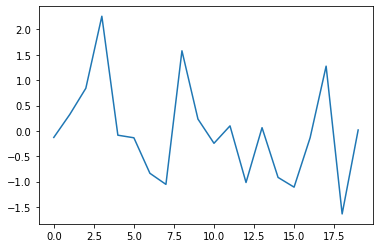

In [ ]:
#간단한 꺽은선 그래프
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

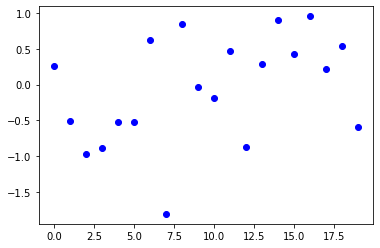

In [ ]:
#간단한 점 그래프 그래프
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

추가된 '**bo**'부분은 파란색(blue) 점(o)을 나타낸다. 선을 나타내고 싶으면 '**b-**, 점선을 나타내고 싶으면 '**b--**', 색깔을 바꾸고 싶으면 b를 다른 색을 나타내는 값(빨간색(r), 노란색(y), 초록색(g), 검정색(k))등으로 바꾸면 된다.

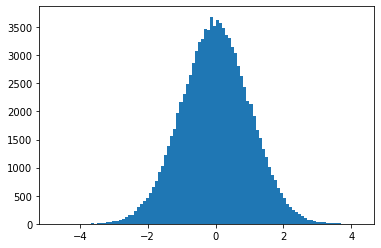

In [ ]:
#정규 분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 레이어 XOR 네트워크의 정보 시각화

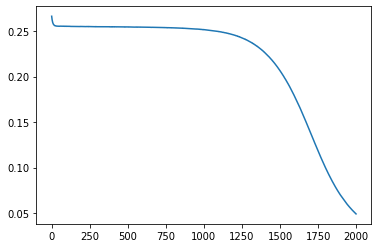

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])